In [1]:
using DispersionCurves
using LaTeXStrings
include("plotting.jl")

plot_disp (generic function with 1 method)

We wish to find roots of a dispersion function $D(\omega, k_\perp) = 0$, which is defined in terms of the plasma dispersion function $Z(\zeta)$. This function is provided by the `DispersionCurves` package.

In [2]:
α       = 1/6                # respective weight of two Maxwellians (0 <= α <= 1)
vth1    = [0.1/√2, 0.1/√2]   # Thermal velocity  beam (parallel)
vth2    = [0.1/√2, 0.1/√2]   # Thermal velocity  beam (perpendicular)
u1      = [0, 0]             # streaming velocity in x
u2      = [0.5, -0.1]        # Streaming velocity in y
ωp      = [1, 1]             # Plasma frequency  
c       = 1                  # speed of light
kperp0  = 0.2

function D(ω, k)
  ζ = [ω / (√2 * k * vth1[1]), ω / (√2 * k * vth1[2])]
  Dxx = (ω/c)^2 * (1 + α * (ωp[1]/(k*vth1[1]))^2  * (1 + ζ[1] * Z(ζ[1])) + (1 - α) * (ωp[2]/(k*vth1[2]))^2  * (1 + ζ[2] * Z(ζ[2])))
  Dyy = (ω/c)^2 - k^2 - (α * (ωp[1]/c)^2 * (1 - ((u2[1]/vth1[1])^2 + (vth2[1]/vth1[1])^2) * (1 + ζ[1] * Z(ζ[1]))) + (1- α) * (ωp[2]/c)^2 * (1 - ((u2[2]/vth1[2])^2 + (vth2[2]/vth1[2])^2) * (1 + ζ[2] * Z(ζ[2]))))
  Dxy = (ω/c)^2 * (α * (ωp[1] / (k * vth1[1]))^2 * (k * u1[1] / ω) * (1 + ζ[1] * Z(ζ[1])) - (1 - α) *  (ωp[2] / (k * vth1[2]))^2 * (k * u1[2] / ω) * (1 + ζ[2] * Z(ζ[2])))
  Dzz = (ω/c)^2 - k^2 - (α * (ωp[1]/c)^2 * (1 - (vth2[1]/vth1[1])^2 * (1 + ζ[1] * Z(ζ[1]))) + (1 - α) * (ωp[2]/c)^2 * (1 - (vth2[2]/vth1[2])^2 * (1 + ζ[2] * Z(ζ[2]))))
  
  return (Dxx * Dyy - Dxy^2) * Dzz
end

D (generic function with 1 method)

Before we can compute the curve $(\omega(k_\perp), k_\perp)$ for which $D(\omega(k_\perp), k_\perp) = 0$, we must find a starting point, which we denote by $(\omega_0, {k_\perp}_0)$. To this end we define a box with corners $z_0, z_1 \in \mathbb{C}$, and use contour integration to find all of the roots.

ω0 = 0.051 - 0.025im with D(ω0, kperp0) = 9.8e-7
ω0 = 3.2e-9 + 0.04im with D(ω0, kperp0) = 1.1e-7
ω0 = 1.3e-9 - 1.0e-9im with D(ω0, kperp0) = 5.5e-15
ω0 = 0.04 - 0.027im with D(ω0, kperp0) = 0.00011
ω0 = 3.2e-9 - 0.00044im with D(ω0, kperp0) = 3.7e-9
ω0 = 0.047 - 0.024im with D(ω0, kperp0) = 1.2e-6


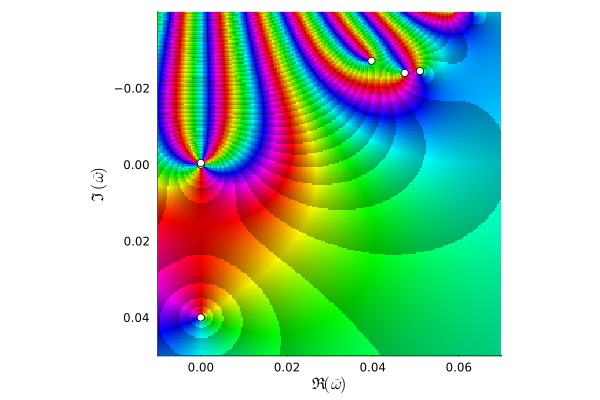

In [3]:
z0 = -0.01 - 0.04im
z1 = 0.07 + 0.05im

ω0s = find_zeros(z -> D(z, kperp0), z0, z1)
for ω0 ∈ ω0s
  # Print the root, as well as its function value
  println("ω0 = $(round(ω0, sigdigits=2)) with D(ω0, kperp0) = $(round(abs(D(ω0, kperp0)), sigdigits=2))")
end

# Plot the dispersion function D as function of ω inside the box defined by z0, z1
plot_disp(z -> D(z, kperp0), z0, z1, n=250, roots=ω0s)

For each pair $(\omega_0, {k_\perp}_0)$ we now continue the solution until we reach ${k_\perp}_1$, and plot the resulting dispersion curves.

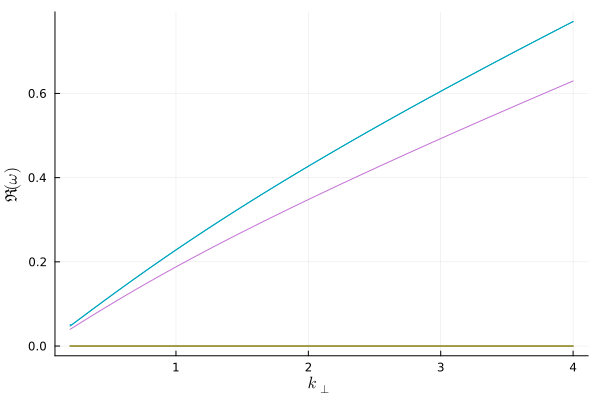

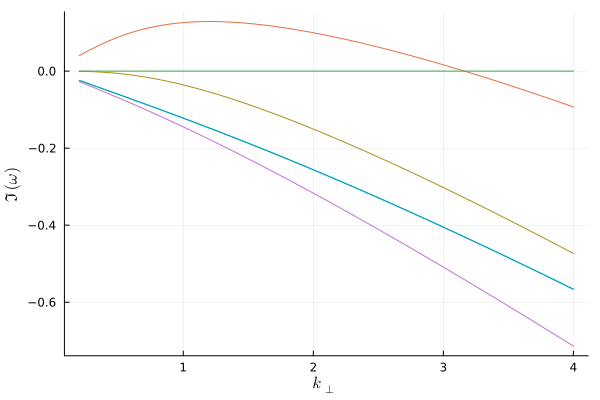

In [5]:
kperp1  = 4.

# Initialize the plots
plt_re = plot(legend=false, xlabel=L"k_\perp", ylabel=L"\Re(\omega)")
plt_im = plot(legend=false, xlabel=L"k_\perp", ylabel=L"\Im(\omega)")
for ω0 ∈ ω0s
    ωs, ks = continue_zero(D, ω0, kperp0, kperp1, steps=max(200, Int(round(kperp1 - kperp0)/1E-2)))

  plot!(plt_re, ks, real(ωs))
  plot!(plt_im, ks, imag(ωs))
end

display(plt_re)
display(plt_im)